## dữ liệu 'nycflights'
Sử dụng Pandas và Seaborn thực hiện phân tích EDA
*  Làm giàu dữ liệu bằng cách thêm các thông tin (dẫn xuất) chưa có trong dữ liệu
** Chuyến bay trễ hay không trễ ⇒ Suy ra từ dep_delay
** Thông tin về buổi trong ngày ⇒ Suy ra từ thời gian
** Thông tin về ngày trong tuần ⇒ Suy ra từ ngày tháng năm
* Sử dụng hàm sns.countplot()


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [8]:
df = pd.read_csv('data/nycflights.csv', low_memory=False, index_col=0)
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [9]:
df.dropna(inplace=True, axis=0)
df.reset_index(inplace=True,drop=True)
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209,22.0,40.0
327342,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,22.0,40.0
327343,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264,22.0,41.0
327344,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,23.0,7.0


### Chuyến bay trễ hay không trễ ⇒ Suy ra từ dep_delay

In [10]:
df['is_delayed'] = df['dep_delay'] >=0
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,is_delayed
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,True
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,True
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,True
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,False
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209,22.0,40.0,False
327342,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,22.0,40.0,False
327343,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264,22.0,41.0,False
327344,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,23.0,7.0,True


### Thông tin về buổi trong ngày ⇒ Suy ra từ thời gian

In [13]:
time_of_day = pd.Series(['Evening'] * df['hour'].size)
time_of_day[df['hour'] <12] = 'Morning'
time_of_day[(df['hour'] >=12) & (df['hour'] <18)]='Afternoon'
df['time_of_day'] = time_of_day
df.drop(['hour','minute'], inplace=True, axis=1)
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,is_delayed,time_of_day
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,True,Morning
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,True,Morning
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,True,Morning
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,False,Morning
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,False,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209,False,Evening
327342,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,False,Evening
327343,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264,False,Evening
327344,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,True,Evening


### Thông tin về ngày trong tuần ⇒ Suy ra từ ngày tháng năm

In [16]:
day_of_wk = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
             'Friday', 'Saturday', 'Sunday']
df['day_of_wk'] = pd.to_datetime(df[['year','month','day']]).dt.day_name()
df.drop(['year','month','day'], inplace=True, axis=1)
df

,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,is_delayed,time_of_day,day_of_wk
0,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,True,Morning,Tuesday
1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,True,Morning,Tuesday
2,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,True,Morning,Tuesday
3,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,False,Morning,Tuesday
4,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,False,Morning,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209,False,Evening,Monday
327342,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,False,Evening,Monday
327343,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264,False,Evening,Monday
327344,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,True,Evening,Monday


### Sử dụng hàm sns.countplot()

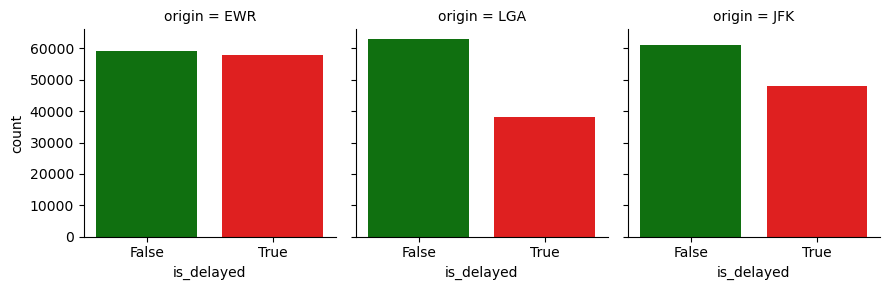

In [27]:
bd_delay = sns.FacetGrid(df, col='origin')

bd_delay.map_dataframe(sns.countplot,
                      x='is_delayed',
                      palette=['g','r']);

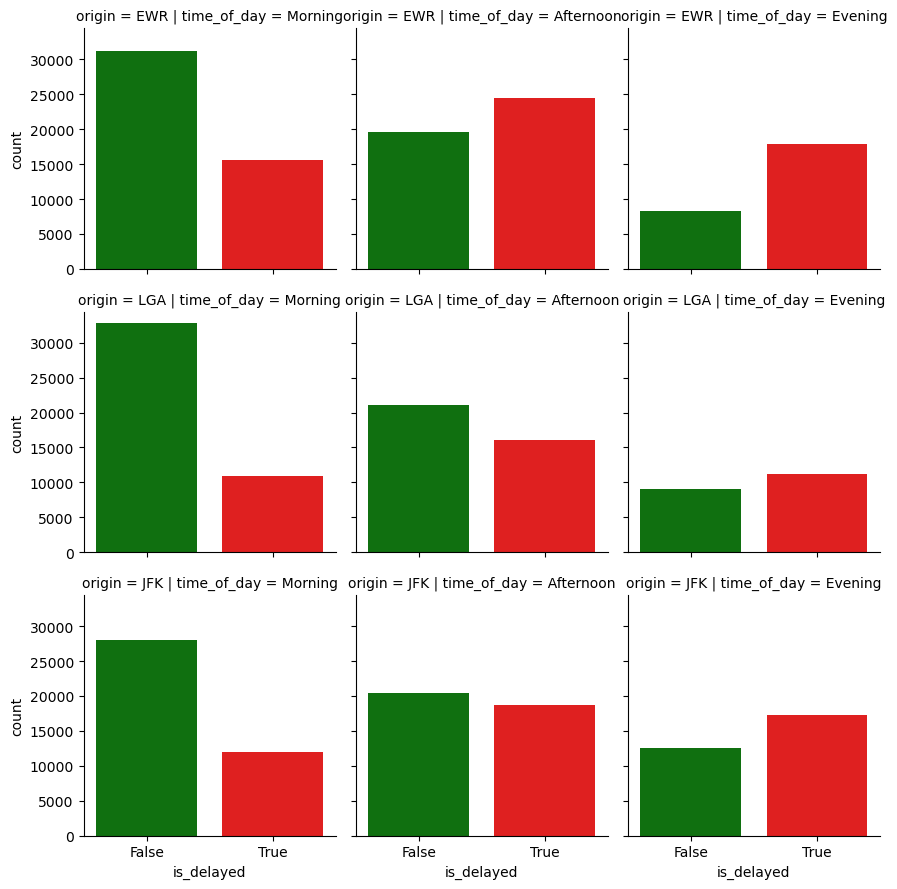

In [30]:
bd_tod = sns.FacetGrid(df, col='time_of_day', row='origin')

bd_tod.map_dataframe(sns.countplot,
                    x='is_delayed',
                    palette=['g','r'],
                    dodge=True);

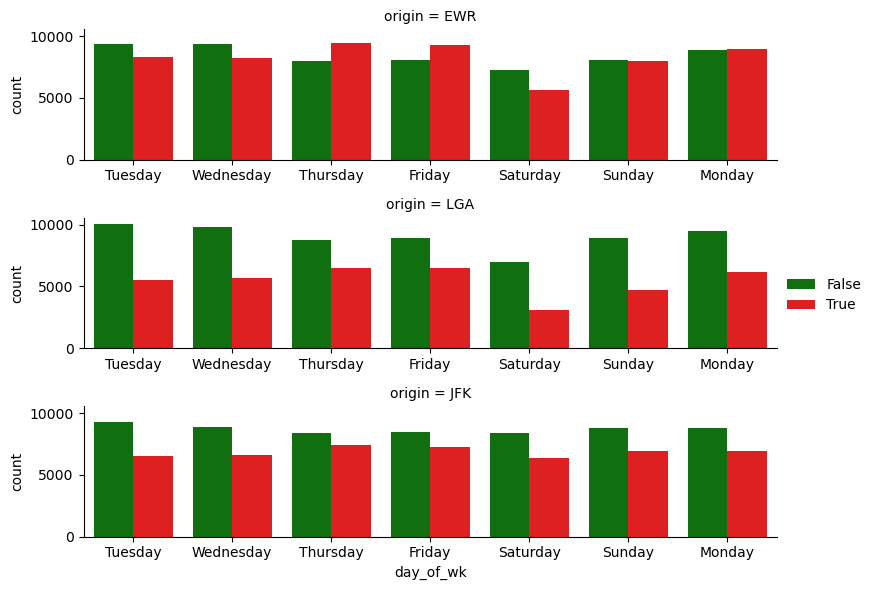

In [33]:
bd_dow = sns.FacetGrid(df, row='origin',
                       sharex=False, sharey=True,
                       height=2, aspect=4)

bd_dow.map_dataframe(sns.countplot,
                    x='day_of_wk', hue='is_delayed',
                    palette=['g','r'],
                    dodge=True);
bd_dow.add_legend()